First we grab the adjusted close price from the 6 stocks from yahoo using yfinance, formattting it into a pandas data frame. And then we take the adjusted close price from each ticker.

In [12]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
yf.download('BAC', start=start_date)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-01,23.520000,23.770000,23.350000,23.610001,20.127588,72382900
2017-05-02,23.610001,23.670000,23.330000,23.530001,20.059385,60262600
2017-05-03,23.370001,23.780001,23.340000,23.770000,20.263987,64272800
2017-05-04,23.980000,24.049999,23.730000,23.850000,20.332186,68133400
2017-05-05,23.980000,23.990000,23.600000,23.740000,20.238409,56678800
...,...,...,...,...,...,...
2024-03-05,34.930000,35.720001,34.869999,35.389999,35.389999,47591600
2024-03-06,35.650002,35.790001,35.070000,35.419998,35.419998,49149700
2024-03-07,35.599998,35.900002,35.250000,35.630001,35.630001,35900700


In [14]:

# Define the list of tickers
tickers = ['BAC','GOOG','AAPL','NVDA','AMD','TSLA']

# Define the start date
start_date = '2017-05-01'

# Initialize an empty DataFrame to store adjusted close prices
adjusted_close_prices = pd.DataFrame()

# Fetch adjusted close prices for each ticker
for ticker in tickers:
    # Fetch historical data from Yahoo Finance
    data = yf.download(ticker, start=start_date)
    
    daily_close_prices = data['Adj Close']
    
    # Add the ticker's daily close prices to the DataFrame
    adjusted_close_prices[ticker] = daily_close_prices

# Output the adjusted daily close prices to a CSV file
adjusted_close_prices

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,BAC,GOOG,AAPL,NVDA,AMD,TSLA
Date,,,,,,
2017-05-01,20.127584,45.628502,34.207829,26.308863,13.620000,21.521999
2017-05-02,20.059383,45.821999,34.424854,25.529268,10.320000,21.259333
2017-05-03,20.263985,46.352001,34.319839,25.719233,10.390000,20.734667
2017-05-04,20.332186,46.583000,34.196152,25.620554,10.100000,19.697332
2017-05-05,20.238407,46.356499,34.763245,25.623020,10.190000,20.556667
...,...,...,...,...,...,...
2024-03-05,35.389999,133.779999,170.119995,859.640015,205.130005,180.740005
2024-03-06,35.419998,132.559998,169.119995,887.000000,210.630005,176.539993
2024-03-07,35.630001,135.240005,169.000000,926.690002,211.380005,178.649994


## Portfolio Overview
We then plot the tickers simulataneously and compare them amongst each other, and observe that the original portfolio performed similarly to each other with adjusted close prices being under 200. The portfolio dipped slightly in early 2020 and started to rise with TSLA stock making up the majority and NVDA following closely behind, the other stocks (AAPL,AMD,GOOG) seems to exhibit the same growth rate.

In 2023, NVDA stock blew up and now dominates the majority of the stocks holdings and now the portfolio's values is vulnerable to fluctuations within the semi-conductor sector.

In [2]:
table = adjusted_close_price

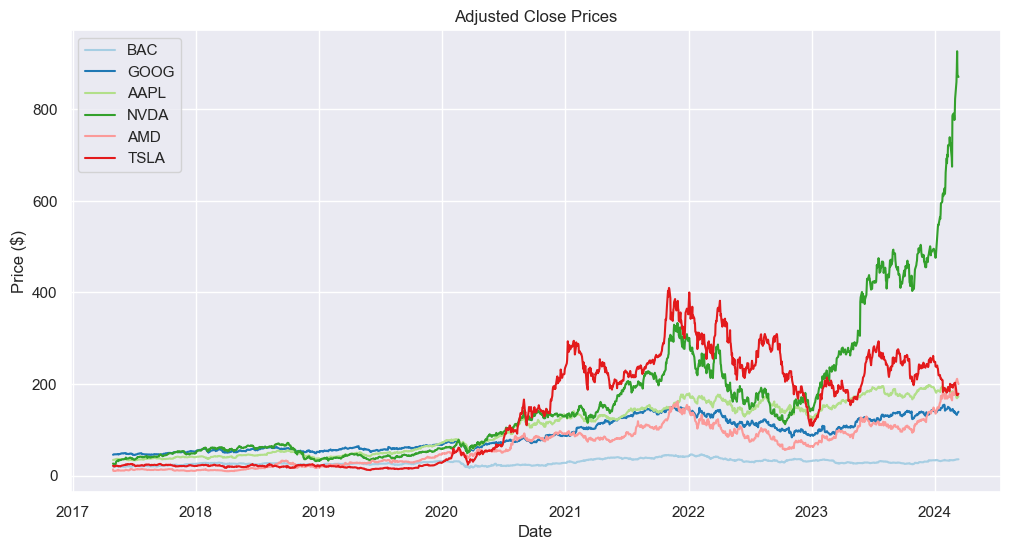

In [3]:
# Use Seaborn to plot the adjusted close prices
sns.set(style="darkgrid")
sns.set_palette("Paired")
plt.figure(figsize=(12, 6))

# Plot the adjusted close prices
for ticker in tickers:
    sns.lineplot(data=table[ticker], label=ticker)

plt.title('Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

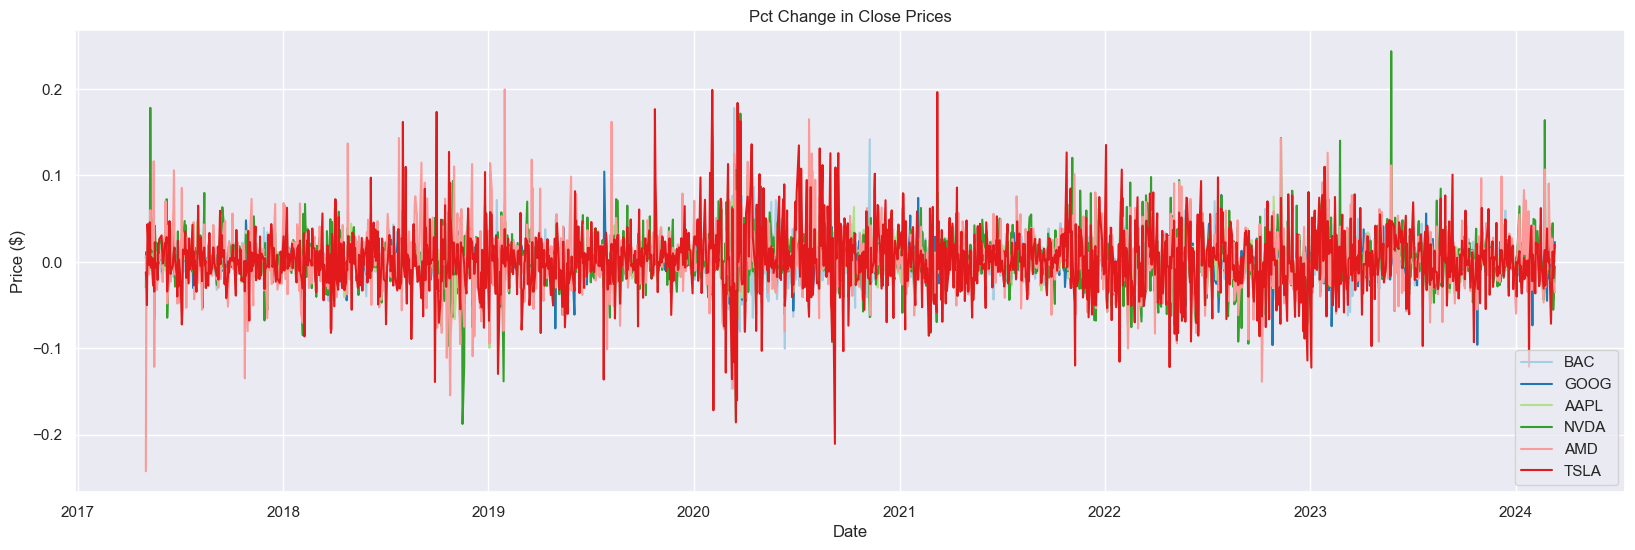

In [4]:
returns = table.pct_change()
plt.figure(figsize=(20, 6))
for ticker in tickers:
    sns.lineplot(data=returns[ticker], label=ticker)

plt.title('Pct Change in Close Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

## Portfolio Allocation

Now we implement the Markowitz Portfolio Theory, which will analyze the annualised performance data and find the optimal weights needed to rebalance the portfolio. Ultimately balancing risk and return by having the optimal mix of assets.

The code below generates random weights for 6 stocks making up 100000 different portfolios, using the historical data (% change) we can calculate the volatility (standard dev) and return of the portfolio (expected return). To get a plot of all the attainable portfolios : 

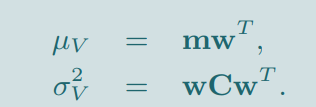

where C is the covariance matrix of our stocks.

The Sharpe ratio given by (Expected return - Risk free rate(here we picked =0.02)) / (sd), quantifies and indicates how much excess return a portfolio generates for each unit it takes. This implies that a higher Sharpe Ratio implies better performance.

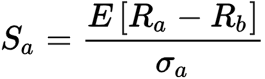

In [5]:
# Defining a function to compute the annualized performance of a portfolio
def portfolio_annualised_performance(weights,mean_returns,cov_matrix):
    returns = np.sum(mean_returns*weights)*252
    std = np.sqrt(np.dot(weights.T,np.dot(cov_matrix,weights)))*np.sqrt(252)
    return std,returns

In [6]:
# Defining a function to generate random portfolios
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3, num_portfolios))
    weights_record = []
     # Generate random weights
    for i in range(num_portfolios):
        weights = np.random.random(6)
        weights /= np.sum(weights)
        weights_record.append(weights)
        # Compute portfolio performance metrics
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0, i] = portfolio_std_dev #volatility - sigma
        results[1, i] = portfolio_return #expected return - mu
        results[2, i] = (portfolio_return - risk_free_rate) / portfolio_std_dev #Sharpe Ratio 
    return results, weights_record

In [7]:
# Calculate returns, mean returns, and covariance matrix
returns = table.pct_change()
mean_returns = returns.mean().values
cov_matrix = returns.cov().values
# Set parameters for portfolio optimization
num_portfolios = 40000
risk_free_rate = 0.02

In [9]:
# Define a function to display the efficient frontier

def display_sim_ef(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    # Generate random portfolios using previous 
    results, weights_record = random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)
    # Find the index of the portfolio with the maximum Sharpe ratio
    max_sharpe_idx = np.argmax(results[2])
    sdp,rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    
    # Extract allocation of assets in the portfolio with the maximum Sharpe ratio
    max_sharpe_allocation = pd.DataFrame(weights_record[max_sharpe_idx], index=table.columns, columns=['allocation'])
    # expressing weight allocation as a percentage
    max_sharpe_allocation.allocation = [round(i*100, 2) for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    # Find the index of the portfolio with the minimum volatility
    min_vol_idx = np.argmin(results[0])
    sdp_min,rp_min = results[0,min_vol_idx],results[1,min_vol_idx]
    # Extract allocation of assets in the portfolio with the minimum volatility
    min_vol_allocation = pd.DataFrame(weights_record[min_vol_idx], index=table.columns, columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100, 2) for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T

    print('Max Sharpe Ratio Portfolio Allocation\n')
    print('Annualised Return:', round(rp, 2))
    print('Annualised Volatility:', round(sdp, 2))
    print(max_sharpe_allocation)
    print("-----------------------------------------------")
    print('Minimum Volatility Portfolio Allocation\n')
    print('Annualised Return:', round(rp_min, 2))
    print('Annualised Volatility:', round(sdp_min, 2))
    print(min_vol_allocation)
        
        
    plt.figure(figsize=(8,6))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='magma',marker='o',s=10,alpha=0.3)
    plt.colorbar()
    plt.title('Portfolio Optimization based on the Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.scatter(sdp,rp,marker = '*',color ='r',label = 'Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker = '*',color ='g',label = 'Minimum volatility')
    plt.legend(labelspacing = 0.8)


Max Sharpe Ratio Portfolio Allocation

Annualised Return: 0.56
Annualised Volatility: 0.43
             BAC  GOOG  AAPL   NVDA   AMD   TSLA
allocation  5.89  0.39  8.61  70.32  1.06  13.74
-----------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.23
Annualised Volatility: 0.26
              BAC   GOOG   AAPL  NVDA   AMD  TSLA
allocation  30.22  32.28  32.61  1.05  1.36  2.48


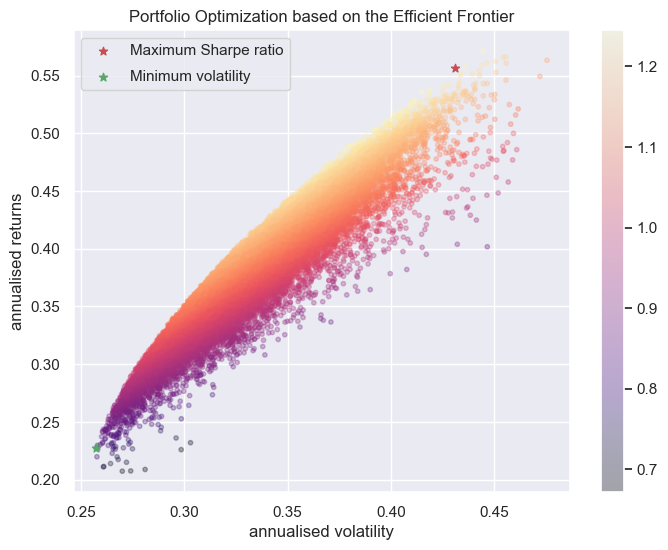

In [10]:
display_sim_ef(mean_returns,cov_matrix,num_portfolios,risk_free_rate)